In [85]:
import os
os.chdir(os.getcwd())

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics
%matplotlib inline

In [87]:
orig_df = pd.read_csv("titanic_data_preprocessed.csv")
orig_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [88]:
orig_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
orig_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [90]:
df = orig_df[['Pclass','Age','SibSp', 'Parch','Fare']]
df.tail()

,Pclass,Age,SibSp,Parch,Fare
886,2,27.000000,0,0,13.00
887,1,19.000000,0,0,30.00
888,3,29.699118,1,2,23.45
889,1,26.000000,0,0,30.00
890,3,32.000000,0,0,7.75


In [91]:
df.loc[891] = [3,63,5,6,37]

/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [92]:
df.tail()

,Pclass,Age,SibSp,Parch,Fare
887,1,19.000000,0,0,30.00
888,3,29.699118,1,2,23.45
889,1,26.000000,0,0,30.00
890,3,32.000000,0,0,7.75
891,3,63.000000,5,6,37.00


In [93]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,0.826596,-0.593507,0.424571,-0.469141,-0.502833
1,-1.567312,0.633943,0.424571,-0.469141,0.787174
2,0.826596,-0.286644,-0.474995,-0.469141,-0.489234
3,-1.567312,0.403797,0.424571,-0.469141,0.420856
4,0.826596,0.403797,-0.474995,-0.469141,-0.486716


In [94]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbor_model = neighbors.fit(df_normalized)
distances, indices = neighbor_model.kneighbors(df_normalized)
distances

array([[0.00000000e+00, 9.26086973e-02],
       [0.00000000e+00, 2.16283249e-01],
       [0.00000000e+00, 5.88259627e-04],
       ...,
       [0.00000000e+00, 7.73741133e-02],
       [0.00000000e+00, 2.09920045e-03],
       [0.00000000e+00, 3.91680674e+00]])

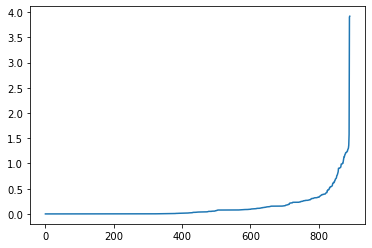

In [95]:
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])

In [96]:
# Choose value for eps and min_samples
eps_value = 1.0
min_sample_value = 4

In [97]:
dbscan=DBSCAN(eps=eps_value,min_samples=min_sample_value)
model=dbscan.fit(df_normalized)

In [98]:
labels = model.labels_
labels

array([ 0,  1,  0,  1,  0,  0,  1,  2,  3,  4,  2,  1,  0,  5,  0,  4,  2,
        4,  0,  0,  4,  4,  0,  1,  2,  5,  0,  6,  0,  0,  1,  1,  0,  4,
        1,  1,  0,  0,  0,  0,  0,  4,  0,  7,  0,  0,  0,  0,  0,  0,  2,
        0,  1,  4,  8,  1,  4,  0,  7,  9,  0,  1,  1,  9,  1,  2,  4,  0,
        9,  0,  4,  9,  4,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  1,  4,
        0, -1,  0,  6,  0,  0,  0,  1,  3,  0,  0,  1, 10, 11,  4,  0,  0,
       10,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  4, -1,
        9, -1,  0,  4,  4,  8,  0,  0,  0,  2,  0,  0,  0,  0,  4,  4,  4,
       -1,  1,  0,  1,  3,  0,  0,  0,  4, 11,  0,  9,  7,  4,  4,  1,  0,
        3,  0,  8,  0,  0,  0, 12,  2,  4,  0,  0,  2, 13, 10, -1,  1,  0,
        1,  2,  2,  0,  1,  2, 14,  1,  4,  0, 12,  4,  9, 11, 13,  1,  0,
        1,  2,  0,  4,  4,  0, 11,  1, -1,  0,  2,  0,  4,  0, 12,  0,  0,
        0,  2,  0,  0,  0,  1,  0,  4,  0,  4,  0,  1,  0,  4,  1,  4,  0,
        4,  0,  0,  1,  0

In [99]:
cluster_ids = pd.Series(labels).unique()
cluster_ids 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, -1, 10, 11, 12, 13, 14, 15])

In [100]:
n_clusters=len(cluster_ids)-1   # -1 = noise
n_clusters

16

In [101]:
cluster_predictions = dbscan.fit_predict(df_normalized)
df['cluster_id'] = cluster_predictions
df.tail(10)

/var/folders/37/ffyx67ps24v157rdzs_y3pkc0000gn/T/ipykernel_4086/1927888074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_id'] = cluster_predictions


,Pclass,Age,SibSp,Parch,Fare,cluster_id
882,3,22.000000,0,0,10.5167,0
883,2,28.000000,0,0,10.5000,4
884,3,25.000000,0,0,7.0500,0
885,3,39.000000,0,5,29.1250,5
886,2,27.000000,0,0,13.0000,4
887,1,19.000000,0,0,30.0000,1
888,3,29.699118,1,2,23.4500,3
889,1,26.000000,0,0,30.0000,1
890,3,32.000000,0,0,7.7500,0
891,3,63.000000,5,6,37.0000,-1


In [102]:
print(metrics.silhouette_score(df,labels))

-0.10712655837140189


In [103]:
print(metrics.davies_bouldin_score(df,model.labels_))

2.5940483616261414


In [104]:
df.cluster_id.value_counts()

 0     381
 1     154
 4     130
 2      51
-1      43
 11     31
 9      20
 8      19
 7      15
 3      11
 12      7
 10      6
 6       5
 5       5
 13      5
 15      5
 14      4
Name: cluster_id, dtype: int64

In [105]:
df[df.cluster_id==0].mean()

Pclass         3.000000
Age           28.407603
SibSp          0.181102
Parch          0.000000
Fare          10.023412
cluster_id     0.000000
dtype: float64

In [106]:
df[df.cluster_id==1].mean()

Pclass         1.000000
Age           38.275170
SibSp          0.363636
Parch          0.000000
Fare          56.324161
cluster_id     1.000000
dtype: float64

In [107]:
df[df.cluster_id==14].mean()

Pclass         3.000000
Age           29.699118
SibSp          3.000000
Parch          1.000000
Fare          25.466700
cluster_id    14.000000
dtype: float64

In [108]:
df[df.cluster_id==15].mean()

Pclass          1.000000
Age            33.679647
SibSp           0.000000
Parch           0.000000
Fare          223.138340
cluster_id     15.000000
dtype: float64

In [109]:
df[df.cluster_id==-1].mean()

Pclass          1.558140
Age            32.416744
SibSp           0.767442
Parch           1.953488
Fare          133.132847
cluster_id     -1.000000
dtype: float64